In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [52]:
#Setting directory
home = os.path.expanduser('~')
os.chdir(os.path.join(os.path.expanduser('~'), 'Documents'))


In [53]:
df = pd.read_csv("Problem 1—quality.csv")
df2 = pd.read_csv("Problem 2—wine dataset.csv")

In [54]:
X = df.drop(["label", "S.No." ], axis=1)
y = df["label"].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = LogisticRegression()

#fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score
print("Accuracy:", clf.score(X_test, y_test))



Accuracy: 0.8333333333333334


C:\Users\Randy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Based on the First model the accuracy score we got was .83 of 83% (rounded)

In [58]:
# 2 subsets
#First subset is Number of senetences, misspelled words and number of characters
X = df[["num_sentences", "num_misspelled", "num_characters"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", model.score(X_test, y_test))



Accuracy: 0.6666666666666666


This model resulted in an accuracy of .66 of 66% (rounded)

I chose these three predictors becasue I beleived they would be a good subset based on some assumptions. More characters are generally better. Mispellings would balance out the the length, and the number fo characters can tell the complexity. 

In [59]:
#Second subset

X = df[["num_words", "bin_start_small", "num_characters"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.5


The resulting accuracy of the model was .5 or 50%

For this subset I chose randomly, as my assumptions were proven wrong in the previous subset. 

# Problem 2

In [63]:
#establiush label and predictor variables
X = df2.drop(['high_quality', 'color'], axis = 1)
y = df2['high_quality']

In [64]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# select the top 3 strongest predictors
selector = SelectKBest(f_classif, k=3)
X_new = selector.fit_transform(X, y)

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# train the classifier on the training set
knn.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# print the indices of the selected features
print(f'Selected Features: {selector.get_support(indices=True)}')

Accuracy: 1.0
Selected Features: [ 7 10 11]


C:\Users\Randy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Using a f class and Select K best imports from sci kit feature selection it has been determined that density and alcohol level are the strongest predictors. Althoughteh previous slected feature mentions index 11, index 11 specifies quality already which makes it irrelevant when predicting high quality. I'll be using those 2 features mentioned for the final part fothe assignment.
I got this idea from ChatGPT using the prompt "How do I find the strongest predictors in a dataset using the KNN classification algorthm"

C:\Users\Randy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Randy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

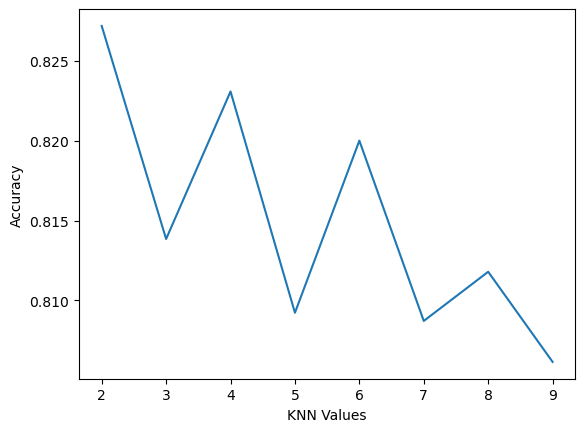

In [65]:
X = df2[['density', 'alcohol']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracies = []
knn_values = range(2, 10)

# loop through k values and calculate accuracy
for k in knn_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(knn_values, accuracies)
plt.xlabel('KNN Values')
plt.ylabel('Accuracy')
plt.show()

warnings.filterwarnings(action='once')